# EXERCISE AND PHYSICAL FITNESS : How Weight is Affected by Nutrition, Sleep and Activity

`Francis Kamundia`

* Import health data, analyze trends, and make recommendations
* Sample data from 7/27/18 - 2/16/19

`PART 1`

* 1. Idea of the project -  The objective of the project is to analyze the correlation between weight and Nutrition, Sleep and Exercise.
* 2. General intention with the dataset - The dataset obtained is to be cleaned, broken down and analyzed so as to find the correlation between different categories of the dataset i.e weight and Nutrition, Sleep and Exercise.
* 3. Potential weaknesses of the project - Was rather difficult to have an exact finding on sleep against weight loss since one cannot have consistent time of sleeping in any given time. Also, some of the meals taken (Nutrition) may have alcoholic content leading to a skewed finding.

`PART 2`

* 1. The project - The objective of the project is to analyze the correlation between weight and Nutrition, Sleep and Exercise.
*    Key findings: Increased activity leads to weight loss. Nutrition with less calories helps one not gain weight. Sleep is important in weight loss.
* 2. Visualizations - As seen below. Images of the same uploaded too.
* 3. Weakness/uncertainty, and suggests further work- Was rather difficult to have an exact finding on sleep against weight loss since one cannot have consistent time of sleeping in any given time. Also, some of the meals taken (Nutrition) may have alcoholic content leading to a skewed finding. Suggested further work would be extrapolating the data analysis so as to derive the expected weight loss or gain in the future if excercise, nutrition and sleep variables are kept constant.

In [28]:
# Import packages

import os
import numpy as np
import pandas as pd

# below required for VSCode display
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000
pd.options.display.width = 1000

import matplotlib
matplotlib.use('TkAgg')
from matplotlib import pyplot as plt

# comment out line below in VSCode
%matplotlib inline

import seaborn as sns

# VSCode requires print() for all displays

os.chdir('./')

## 1. WEIGHT DATA
* Weigh myself every day except travel at the same time each day prior to meals or working out

In [32]:
# import data file
dfw = pd.read_csv('../Weights2019-02-16.csv')

In [33]:
dfw['Date'] = pd.to_datetime(dfw['Date']) # format as date
dfw.set_index(dfw['Date'], inplace = True) # set as index
dfw.drop(['Date'], axis=1, inplace=True) # drop extra date col
dfw1 = dfw.iloc[::-1] # 
dfw1.drop(dfw1.index[:10], inplace=True) # 

/Users/brianowino/Documents/.venv/cw/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


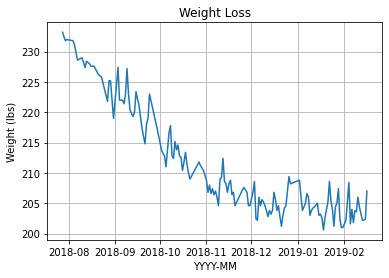

In [34]:
# quick check:
plt.plot(dfw1['Weight'])
plt.title('Weight Loss')
plt.ylabel("Weight (lbs)")
plt.xlabel("YYYY-MM")
plt.grid()
plt.show()

## 2. NUTRITION DATA

In [36]:
# import nutrition
os.chdir('../nutrition')
dfs = [pd.read_csv(f, header=None)
        for f in os.listdir(os.getcwd()) if f.endswith('csv')]
finaldf = pd.concat(dfs, axis=0, join='inner').sort_index()

In [37]:
finaldf.sort_index(inplace=True, ascending=True)
finaldf.columns = finaldf.iloc[1]
finaldf.drop(finaldf.index[:29], inplace=True)
numeric_convert = ['Quantity',
                  'Calories',
                  'Fat (g)',
                  'Protein (g)',
                  'Carbohydrates (g)',
                  'Saturated Fat (g)',
                  'Sugars (g)',
                  'Fiber (g)',
                  'Cholesterol (mg)',
                  'Sodium (mg)'
                  ]
finaldf[numeric_convert] = finaldf[numeric_convert].apply(pd.to_numeric, errors='coerce')

In [38]:
# as datetime
finaldf['Date'] = pd.to_datetime(finaldf['Date'])
# set as index
finaldf.set_index(finaldf['Date'], inplace = True)
# drop Excess date columns
finaldf.drop(['Date'], axis=1, inplace=True)

In [39]:
finaldf.sort_index(inplace=True, ascending=True);

In [40]:
finaldf.drop(pd.Timestamp('2018-07-23'), inplace=True)
finaldf.drop(pd.Timestamp('2018-07-24'), inplace=True)
finaldf.drop(pd.Timestamp('2018-07-25'), inplace=True)
finaldf.drop(pd.Timestamp('2018-07-26'), inplace=True)

In [41]:
finaldf1 = finaldf.groupby([pd.Grouper(freq='D'), 'Type']).sum()
finaldf2 = finaldf1.unstack('Type')
finaldf2.drop('Quantity', axis=1, inplace=True)
finaldf2.fillna(0, inplace=True)
finaldf2.columns = [' '.join(col).strip() for col in finaldf2.columns.values]

In [42]:
finaldf2['Total Intake'] = finaldf2['Calories Afternoon Nosh'] + finaldf2['Calories Ale/Wine 1'] + finaldf2['Calories Breakfast'] + finaldf2['Calories Dessert'] + finaldf2['Calories Dinner'] + finaldf2['Calories Lunch'] + finaldf2['Calories Morning Nosh']
finaldf2['Net Calories'] = finaldf2['Total Intake'] - finaldf2['Calories Exercise']
finaldf2['Daily Fat (g)'] = finaldf2['Fat (g) Afternoon Nosh'] + finaldf2['Fat (g) Ale/Wine 1'] + finaldf2['Fat (g) Breakfast'] + finaldf2['Fat (g) Dessert'] + finaldf2['Fat (g) Dinner'] + finaldf2['Fat (g) Lunch'] + finaldf2['Fat (g) Morning Nosh']
finaldf2['Daily Protein (g)'] = finaldf2['Protein (g) Afternoon Nosh'] + finaldf2['Protein (g) Ale/Wine 1'] + finaldf2['Protein (g) Breakfast'] + finaldf2['Protein (g) Dessert'] + finaldf2['Protein (g) Dinner'] + finaldf2['Protein (g) Lunch'] + finaldf2['Protein (g) Morning Nosh']
finaldf2['Daily Carbohydrates (g)'] =finaldf2['Carbohydrates (g) Afternoon Nosh'] + finaldf2['Carbohydrates (g) Ale/Wine 1'] + finaldf2['Carbohydrates (g) Breakfast'] + finaldf2['Carbohydrates (g) Dessert'] + finaldf2['Carbohydrates (g) Dinner'] + finaldf2['Carbohydrates (g) Lunch'] + finaldf2['Carbohydrates (g) Morning Nosh']
finaldf2['Daily Saturated Fat (g)'] = finaldf2['Saturated Fat (g) Afternoon Nosh'] + finaldf2['Saturated Fat (g) Ale/Wine 1'] + finaldf2['Saturated Fat (g) Breakfast'] + finaldf2['Saturated Fat (g) Dessert'] + finaldf2['Saturated Fat (g) Dinner'] + finaldf2['Saturated Fat (g) Lunch'] + finaldf2['Saturated Fat (g) Morning Nosh']
finaldf2['Daily Sugar (g)'] = finaldf2['Sugars (g) Afternoon Nosh'] + finaldf2['Sugars (g) Ale/Wine 1'] + finaldf2['Sugars (g) Breakfast'] + finaldf2['Sugars (g) Dessert'] + finaldf2['Sugars (g) Dinner'] + finaldf2['Sugars (g) Lunch'] + finaldf2['Sugars (g) Morning Nosh']
finaldf2['Daily Fiber (g)'] = finaldf2['Fiber (g) Afternoon Nosh'] + finaldf2['Fiber (g) Ale/Wine 1'] + finaldf2['Fiber (g) Breakfast'] + finaldf2['Fiber (g) Dessert'] + finaldf2['Fiber (g) Dinner'] + finaldf2['Fiber (g) Lunch'] + finaldf2['Fiber (g) Morning Nosh']
finaldf2['Daily Cholesterol (mg)'] = finaldf2['Cholesterol (mg) Afternoon Nosh'] + finaldf2['Cholesterol (mg) Ale/Wine 1'] + finaldf2['Cholesterol (mg) Breakfast'] + finaldf2['Cholesterol (mg) Dessert'] + finaldf2['Cholesterol (mg) Dinner'] + finaldf2['Cholesterol (mg) Lunch'] + finaldf2['Cholesterol (mg) Morning Nosh']
finaldf2['Daily Sodium (mg)'] = finaldf2['Sodium (mg) Afternoon Nosh'] + finaldf2['Sodium (mg) Ale/Wine 1'] + finaldf2['Sodium (mg) Breakfast'] + finaldf2['Sodium (mg) Dessert'] + finaldf2['Sodium (mg) Dinner'] + finaldf2['Sodium (mg) Lunch'] + finaldf2['Sodium (mg) Morning Nosh']

In [43]:
finaldf2.drop(finaldf2.iloc[:, 8:72], inplace=True, axis=1);

In [44]:
df = pd.concat([finaldf2, dfw1], axis=1, sort=False)
df['Weight'].fillna(method='ffill', inplace=True)

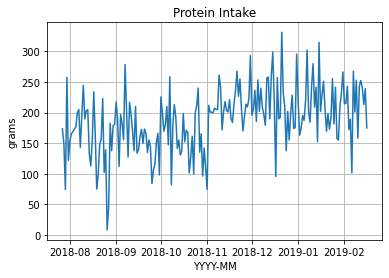

In [45]:
# quick check
plt.plot(df.index, df['Daily Protein (g)'])
plt.title('Protein Intake')
plt.ylabel('grams')
plt.xlabel('YYYY-MM')
#plt.text(0.5, 0.5, 'test')
plt.grid()
plt.show();

## 3. WORKOUT DATA
* Explore the following trends:
    * Time of day
    * Duration
    * Avg Heartrate

In [47]:
# import nutrition
import os
os.chdir('../workouts')
dfss = [pd.read_csv(f, header=None)
        for f in os.listdir(os.getcwd()) if f.endswith('csv')]
wkdfs = pd.concat(dfss, axis=0, join='inner').sort_index()

In [48]:
wkdfs.sort_index(inplace=True, ascending=True)
wkdfs.columns = wkdfs.iloc[1]
wkdfs.drop(wkdfs.index[0:3], inplace=True)

In [49]:
# as datetime
wkdfs['Date'] = pd.to_datetime(wkdfs['Start'])
# set as index
wkdfs.set_index(wkdfs['Date'], inplace = True)
# drop Excess date columns
cut = ['Start', 'Type', 'End', 'Distance', 'Max Heart Rate', 'Average Pace', 'Average Speed', 'Active Energy kcal', 'Total Energy kcal', 'Date']
wkdfs.drop(cut, axis=1, inplace=True)
#wkdfs.drop(['End'], axis=1, inplace=True)

In [50]:
wkdfs.sort_index(inplace=True, ascending=True);

In [51]:
wkdfs['Duration'] = wkdfs['Duration'].map(lambda x: str(x)[:-3])
#wkdfs.head()
y = wkdfs['Duration'].str.split(':')   
i, j = y.str[0], y.str[1]
wkdfs['Duration_float'] = (i.astype(int) + (j.astype(float) / 60).round(1))
wkdfs.drop(['Duration'], axis=1, inplace=True)

In [52]:
wkdfs['Average Heart Rate'] = wkdfs['Average Heart Rate'].apply(pd.to_numeric, errors='coerce').round(0)

In [53]:
wkdfs['Average Heart Rate'].dropna(how='all',
                                   inplace=True)

In [54]:
wkdfs1 = wkdfs[~wkdfs.isin(['NaN']).any(axis=1)]

In [55]:
wkdfs2 = wkdfs1[wkdfs1['Duration_float'] > 0.2]

In [56]:
wkdfs3 = wkdfs2[wkdfs2['Duration_float'] < 2.5]

In [57]:
wkdfs4 = wkdfs3.copy()
wkdfs4['start_hour'] = wkdfs3.index.hour

In [58]:
wkdfs4['trial'] = wkdfs4.index.strftime('%Y-%m-%d')
# as datetime
wkdfs4['Date1'] = pd.to_datetime(wkdfs4['trial'])
# set as index
wkdfs4.set_index(wkdfs4['Date1'], inplace = True)
# drop Excess date columns
cut1 = ['trial', 'Date1']
wkdfs4.drop(cut1, axis=1, inplace=True)

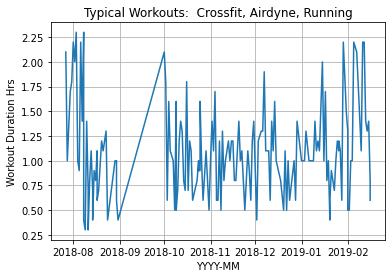

In [59]:
plt.plot(wkdfs4.index, wkdfs4['Duration_float'])
plt.title('Typical Workouts:  Crossfit, Airdyne, Running')
plt.ylabel('Workout Duration Hrs')
plt.xlabel('YYYY-MM')
plt.grid()
plt.show()

## 4. SLEEP DATA

In [60]:
os.chdir('./')

In [61]:
dfsleep = pd.read_csv('../SleepAnalysis.csv')
dfsleep_c = dfsleep.iloc[:,0:3]

In [62]:
dfsleep_c['In bed start'] = pd.to_datetime(dfsleep_c['In bed start'])
dfsleep_c['In bed Finish'] = pd.to_datetime(dfsleep_c['In bed Finish'])

In [63]:
dfsleep_c['hrs_of_sleep'] = (dfsleep_c['Minutes in bed']/60).round(1)

In [64]:
dfsleep_cc = dfsleep_c.set_index(dfsleep_c['In bed Finish']);

In [65]:
dfsleep_cc['trial1'] = dfsleep_cc.index.strftime('%Y-%m-%d')
#wkdfs4.info()
# as datetime

dfsleep_cc['Date11'] = pd.to_datetime(dfsleep_cc['trial1'])
# set as index
dfsleep_cc.set_index(dfsleep_cc['Date11'], inplace = True)
# drop Excess date columns
cut11 = ['trial1', 'Date11', 'In bed start', 'In bed Finish', 'Minutes in bed']
dfsleep_cc.drop(cut11, axis=1, inplace=True)
dfsleep_cc.head();

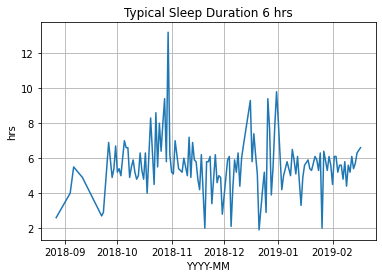

In [66]:
# quick check
plt.plot(dfsleep_cc['hrs_of_sleep'])
plt.title('Typical Sleep Duration 6 hrs')
plt.ylabel('hrs')
plt.xlabel('YYYY-MM')
plt.grid()
plt.show()

## PLOTS

In [67]:
wkdfs5 = wkdfs4.groupby(wkdfs4.index).mean();

In [68]:
dfx = pd.concat([df, wkdfs5], axis=1, sort=False)

In [69]:
dfxy = pd.concat([dfx, dfsleep_cc], axis=1, sort=False)

In [70]:
dfxy.info();

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 206 entries, 2018-07-27 to 2019-02-17
Freq: D
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Calories Afternoon Nosh  205 non-null    float64
 1   Calories Ale/Wine 1      205 non-null    float64
 2   Calories Breakfast       205 non-null    float64
 3   Calories Dessert         205 non-null    float64
 4   Calories Dinner          205 non-null    float64
 5   Calories Exercise        205 non-null    float64
 6   Calories Lunch           205 non-null    float64
 7   Calories Morning Nosh    205 non-null    float64
 8   Total Intake             205 non-null    float64
 9   Net Calories             205 non-null    float64
 10  Daily Fat (g)            205 non-null    float64
 11  Daily Protein (g)        205 non-null    float64
 12  Daily Carbohydrates (g)  205 non-null    float64
 13  Daily Saturated Fat (g)  205 non-null    float64
 14 

In [71]:
dfxy.head()

,Calories Afternoon Nosh,Calories Ale/Wine 1,Calories Breakfast,Calories Dessert,Calories Dinner,Calories Exercise,Calories Lunch,Calories Morning Nosh,Total Intake,Net Calories,Daily Fat (g),Daily Protein (g),Daily Carbohydrates (g),Daily Saturated Fat (g),Daily Sugar (g),Daily Fiber (g),Daily Cholesterol (mg),Daily Sodium (mg),Weight,Average Heart Rate,Duration_float,start_hour,hrs_of_sleep
2018-07-27,0.0,0.0,610.0,0.0,1345.0,1325.038,910.0,45.0,2910.0,1584.962,166.01,173.47,183.02,47.68,53.05,21.71,1088.51,5335.71,NaN,127.0,2.1,5.0,NaN
2018-07-28,0.0,0.0,340.0,180.0,2224.0,1062.000,0.0,100.0,2844.0,1782.000,116.77,148.59,193.33,34.79,56.22,24.70,660.23,2005.43,233.2,138.0,1.0,21.0,NaN
2018-07-29,0.0,149.0,609.0,428.0,938.0,347.000,0.0,282.0,2406.0,2059.000,108.40,74.20,214.14,29.85,40.26,20.41,142.50,1942.19,232.4,NaN,NaN,NaN,NaN
2018-07-30,0.0,149.0,575.0,0.0,1310.0,1387.000,1000.0,381.0,3415.0,2028.000,144.11,257.38,253.00,33.49,41.04,30.79,1225.73,4534.83,231.8,128.0,1.7,4.0,NaN
2018-07-31,0.0,0.0,680.0,0.0,1070.0,1286.000,460.0,120.0,2330.0,1044.000,110.07,121.97,228.91,37.81,42.55,50.48,185.24,3281.20,232.0,118.0,1.8,5.0,NaN


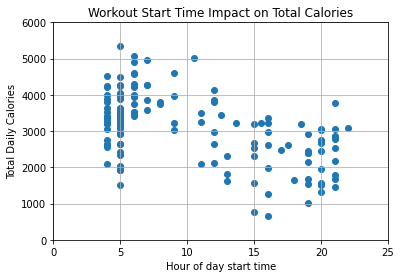

In [72]:
plt.scatter(dfxy['start_hour'], dfxy['Total Intake'])
plt.title('Workout Start Time Impact on Total Calories')
plt.ylabel('Total Daily Calories')
plt.xlabel('Hour of day start time')
plt.grid()
plt.ylim(0, 6000)
plt.xlim(0, 25)
plt.show()

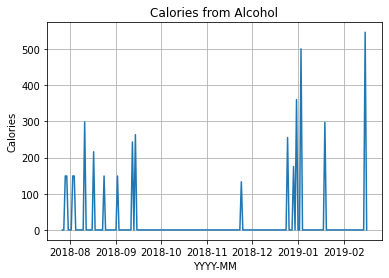

In [73]:
plt.plot(dfxy['Calories Ale/Wine 1'])
plt.title('Calories from Alcohol')
plt.ylabel('Calories')
plt.xlabel('YYYY-MM')
plt.grid()
#plt.ylim(0, 6000)
#plt.xlim(0, 25)
plt.show()

## COMBINATION AXIS PLOTS

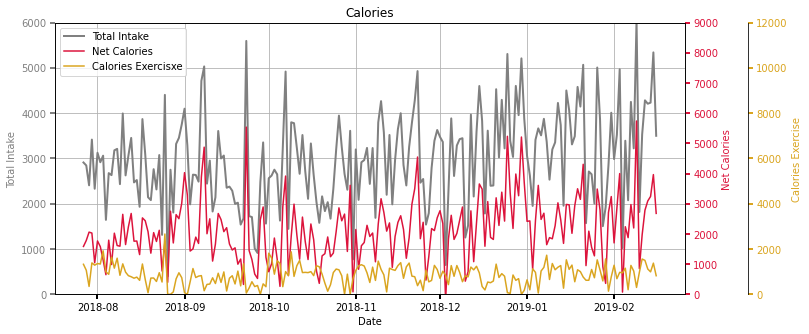

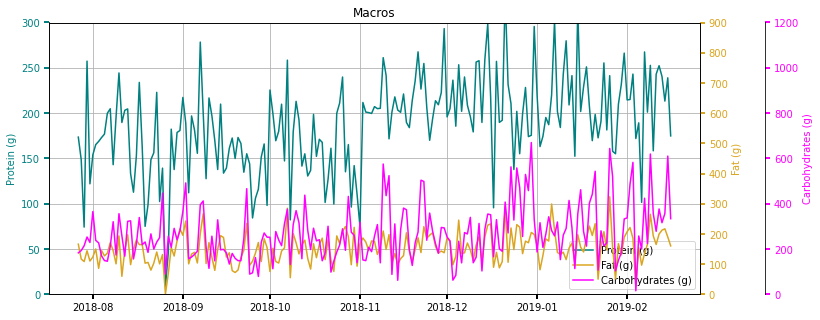

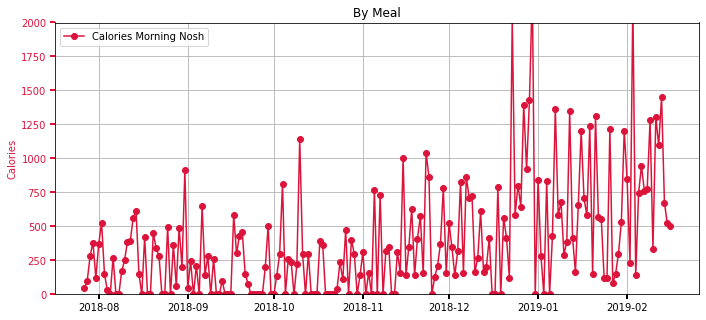

In [74]:
### DEFINE SPINES

def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

### ADD PLOTS
        
fig, ax1 = plt.subplots(figsize=(10,5))
fig.subplots_adjust(right=1)
fig, ax2 = plt.subplots(figsize=(10,5))
fig.subplots_adjust(right=1.03)
fig, ax7 = plt.subplots(figsize=(10,5))
fig.subplots_adjust(right=1.02)

### ADD CURVES > 1

par1_1 = ax1.twinx()
par2_1 = ax1.twinx()

par1_2 = ax2.twinx()
par2_2 = ax2.twinx()


### PART 1
par2_1.spines["right"].set_position(("axes", 1.1))
par2_2.spines['right'].set_position(('axes', 1.1))

### PART 2
make_patch_spines_invisible(par2_1)
make_patch_spines_invisible(par2_2)

### PART 3
par2_1.spines["right"].set_visible(True)
par2_2.spines["right"].set_visible(True)


##############
### PLOT 1 ###
##############

p1_1, = ax1.plot(dfxy['Total Intake'], color='gray', label="Total Intake", linewidth=2)
p2_1, = par1_1.plot(dfxy['Net Calories'], color='crimson', label="Net Calories")
p3_1, = par2_1.plot(dfxy['Calories Exercise'], color='goldenrod', label="Calories Exercisxe")

ax1.set_ylim(0, 6000)
par1_1.set_ylim(0, 9000)
par2_1.set_ylim(0, 12000)

ax1.set_xlabel("Date")
ax1.set_ylabel("Total Intake")
par1_1.set_ylabel("Net Calories")
par2_1.set_ylabel("Calories Exercise")

ax1.yaxis.label.set_color(p1_1.get_color())
par1_1.yaxis.label.set_color(p2_1.get_color())
par2_1.yaxis.label.set_color(p3_1.get_color())

tkw = dict(size=5, width=2)
ax1.tick_params(axis='y', colors=p1_1.get_color(), **tkw)
par1_1.tick_params(axis='y', colors=p2_1.get_color(), **tkw)
par2_1.tick_params(axis='y', colors=p3_1.get_color(), **tkw)
ax1.tick_params(axis='x', **tkw)

lines_1 = [p1_1, p2_1, p3_1] #, p4_1]
ax1.legend(lines_1, [l.get_label() for l in lines_1])

ax1.grid()
ax1.set_title('Calories')

##############
### PLOT 2 ###
##############

p1_2, = ax2.plot(dfxy['Daily Protein (g)'], color='teal', label="Protein (g)")
p2_2, = par1_2.plot(dfxy['Daily Fat (g)'], color='goldenrod', label="Fat (g)")
p3_2, = par2_2.plot(dfxy['Daily Carbohydrates (g)'], color='magenta', label='Carbohydrates (g)')

#ax2.set_xlim(xmin, xmax)
ax2.set_ylim(0, 300)
par1_2.set_ylim(0, 900)
par2_2.set_ylim(0, 1200)

ax2.set_ylabel("Protein (g)")
par1_2.set_ylabel("Fat (g)")
par2_2.set_ylabel("Carbohydrates (g)")

ax2.xaxis.set_visible(True)

ax2.yaxis.label.set_color(p1_2.get_color())
par1_2.yaxis.label.set_color(p2_2.get_color())
par2_2.yaxis.label.set_color(p3_2.get_color())

tkw = dict(size=5, width=2)
ax2.tick_params(axis='y', colors=p1_2.get_color(), **tkw)
par1_2.tick_params(axis='y', colors=p2_2.get_color(), **tkw)
par2_2.tick_params(axis='y', colors=p3_2.get_color(), **tkw)
ax2.tick_params(axis='x', **tkw)

lines_2 = [p1_2, p2_2, p3_2]

ax2.legend(lines_2, [l.get_label() for l in lines_2])
ax2.grid()
ax2.set_title('Macros')


##############
### PLOT 7 ###
##############

#p0_7, = ax7.plot(dfxy['Total Intake'], color='magenta', label='Total Intake', linewidth=7)
p1_7, = ax7.plot(df['Calories Morning Nosh'], color='crimson', label="Calories Morning Nosh", marker='o', linestyle='-')
#p2_7, = ax7.plot(df['Calories Breakfast'], color='black', label='Calories Breakfast', marker='o', linestyle='-')
#p3_7, = ax7.plot(df['Calories Lunch'], color='gray', label='Calories Breakfast')
#p4_7, = ax7.plot(df['Calories Afternoon Nosh'], color='blue', label='Calories Breakfast')
#p5_7, = ax7.plot(df['Calories Dinner'], color='orange', label='Calories Breakfast')
#p6_7, = ax7.plot(df['Calories Dessert'], color='goldenrod', label='Calories Breakfast')
#p7_7, = ax7.plot(df['Calories Ale/Wine 1'], color='yellow', label='Calories Breakfast')

ax7.set_ylim(0, 2000)

ax7.set_ylabel("Calories")

ax7.xaxis.set_visible(True)

ax7.yaxis.label.set_color(p1_7.get_color())

tkw = dict(size=5, width=2)
ax7.tick_params(axis='y', colors=p1_7.get_color(), **tkw)
ax7.tick_params(axis='x', **tkw)

lines_7 = [p1_7]

ax7.legend(lines_7, [l.get_label() for l in lines_7])
ax7.grid()
ax7.set_title('By Meal')


###


#plt.style.use('grayscale')



plt.show()